<a href="https://colab.research.google.com/github/vimanshu/ML/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Feature Crosses
# a feature cross is a synthetic feature created by multiplying 
# two or more features
# linear learners use linear models
# they also scale to massive data
# a feature cross is normally represented using [AxB]
# due to stochastic gardient descent linear models can be trained efficiently


In [2]:
# crossing one hot vector
# this is like logical conjunctions
# country=USA, country=France or language=English, language=Spanish
# after applying cross on one hot encoding 
#   country:usa AND language:spanish


In [3]:
# a visual representation of a feature cross

In [ ]:
# weight of x1=5
# weight of x2=6
# weight of x1.x2=30

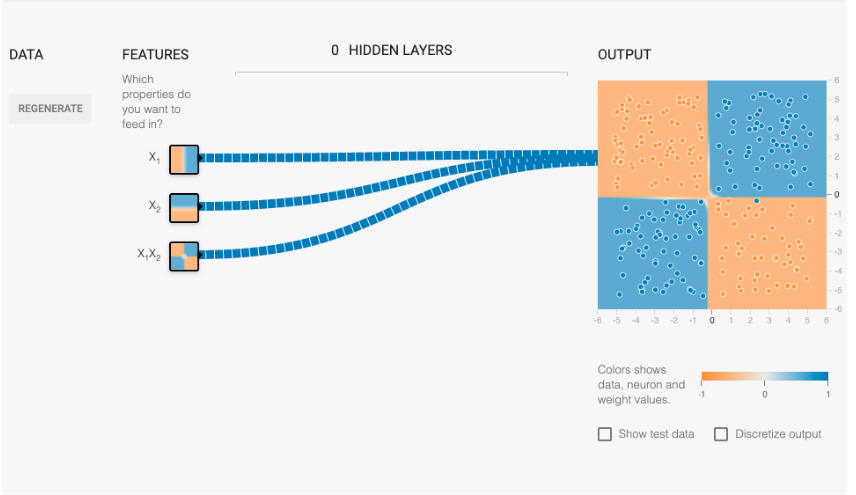

In [8]:
# import the required libs
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.float_format= "{:.1f}".format
tf.keras.backend.set_floatx("float32")

In [9]:
# load the datasets
train_df=pd.read_csv("/content/sample_data/california_housing_train.csv")
test_df=pd.read_csv("/content/sample_data/california_housing_test.csv")

In [10]:
#scale the label  
# 1000 is the scaling factor
train_df["median_house_value"]/=1000.0
test_df["median_house_value"]/=1000.0

In [11]:
# shuffle the example or reindex
shuff_train_df=train_df.reindex(np.random.permutation(train_df.index))

In [12]:
# represent latitude and longitude as floating poinr values
# some of the methods that will be used to create 
# feature col ans bins
# for feature col 
# use: tf.feature_column.numeric_column
# when binning use:
# tf.feature_column.bucketized_column

In [13]:
# creating feature column
feature_columns= []
# numerical feature column to represent latitude
latitude= tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)
# numerical feature column to represent longitude
longitude= tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# converting list of feature columns into a layer that will become
# part of the model
fp_feature_layer= layers.DenseFeatures(feature_columns)


In [20]:
#define function that create and train a model 
def create_model(my_learning_rate, feature_layer):
  model= tf.keras.models.Sequential()
  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, dataset,epochs,batch_size,label_name):
  features= {name:np.array(value) for name, value in dataset.items()}
  label= np.array(features.pop(label_name))
  history=model.fit(x=features,
                    y=label,
                    batch_size=batch_size,
                    epochs=epochs,
                    shuffle=True)
  
  epochs=history.epoch
  hist= pd.DataFrame(history.history)
  rmse= hist["root_mean_squared_error"]

  return epochs,rmse

def plot_the_loss_curve(epochs,rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs,rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()*1.05])
  plt.show()


Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 32998.7707 - root_mean_squared_error: 176.1565
Epoch 2/30
170/170 [==============================] - 0s 1ms/step - loss: 13627.1765 - root_mean_squared_error: 116.7227
Epoch 3/30
170/170 [==============================] - 0s 1ms/step - loss: 13486.3489 - root_mean_squared_error: 116.1298
Epoch 4/30
170/170 [==============================] - 0s 1ms/step - loss: 13483.1504 - root_mean_squared_error: 116.1124
Epoch 5/30
170/170 [==============================] - 0s 1ms/step - loss: 13396.5847 - root_mean_squared_error: 115.7395
Epoch 6/30
170/170 [==============================] - 0s 1ms/step - loss: 13246.1715 - root_mean_squared_error: 115.0866
Epoch 7/30
170/170 [==============================] - 0s 1ms/step - loss: 13546.0086 - root_mean_squared_error: 116.3759
Epoch 8/30
170/170 [=======================

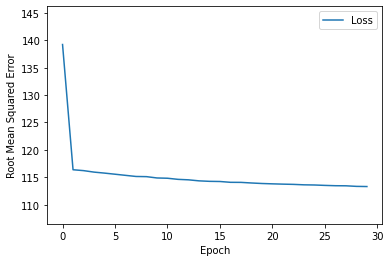


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 940us/step - loss: 12180.0938 - root_mean_squared_error: 110.3635


[12180.09375, 110.36346435546875]

In [21]:
# Training the model with the floating point representation
# what are the hyper-parameters
learning_rate=0.05
epochs= 30
batch_size= 100
label_name= "median_house_value"
my_model= create_model(learning_rate,fp_feature_layer)
# Train the model on the training set
epochs,rmse = train_model(my_model,train_df,epochs,batch_size,label_name)

plot_the_loss_curve(epochs,rmse)
print("\n: Evaluate the new model against the test set:")
test_features= {name:np.array(value) for name, value in test_df.items()}
test_label= np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [27]:
# creating bins for latitude and longitude

resolution_in_degrees =1.0

feature_columns =[]

latitude_as_a_numeric_column= tf.feature_column.numeric_column("latitude")
latitude_boundaries= list(np.arange(int(min(train_df["latitude"])),
                                    int(max(train_df["latitude"])),
                                    resolution_in_degrees))
latitude =tf.feature_column.bucketized_column(latitude_as_a_numeric_column,
                                              latitude_boundaries)
feature_columns.append(latitude)

#create a bucket feature column for longitude

longitude_as_a_numeric_column= tf.feature_column.numeric_column("longitude")
longitude_boundaries= list(np.arange(int (min(train_df["longitude"])),
                                     int (max(train_df["longitude"])),
                                     resolution_in_degrees))
longitude=tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)
feature_columns.append(longitude)

buckets_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 0s 1ms/step - loss: 54373.6032 - root_mean_squared_error: 233.1555
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 46620.1494 - root_mean_squared_error: 215.8972
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 39817.7117 - root_mean_squared_error: 199.5256
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 33793.9842 - root_mean_squared_error: 183.8062
Epoch 5/35
170/170 [==============================] - 0s 1ms/step - loss: 28488.4290 - root_mean_squared_error: 168.7591
Epoch 6/35
170/170 [==============================] - 0s 1ms/step - loss: 23418.8114 - root_mean_squared_error: 153.0216
Epoch 7/35
170/170 [==============================] - 0s 1ms/step - loss: 20555.0138 - root_mean_squared_error: 143.3308
Epoch 8/35
170/170 [=======================

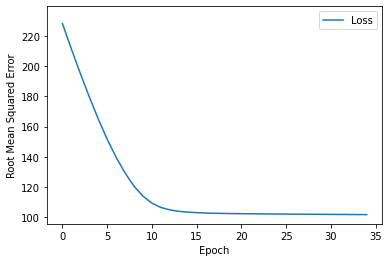


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 10200.3525 - root_mean_squared_error: 100.9968


[10200.3525390625, 100.99679565429688]

In [28]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [31]:
resolution_in_degrees = 0.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 1ms/step - loss: 54807.7691 - root_mean_squared_error: 234.1050
Epoch 2/35
170/170 [==============================] - 0s 1ms/step - loss: 50360.6361 - root_mean_squared_error: 224.3930
Epoch 3/35
170/170 [==============================] - 0s 1ms/step - loss: 45612.5245 - root_mean_squared_error: 213.5522
Epoch 4/35
170/170 [==============================] - 0s 1ms/step - loss: 40605.1211 - root_mean_squared_error: 201.5008
Epoch 5/35
170/170 [==============================] - 0s 1ms/step - loss: 36088.7011 - root_mean_squared_error: 189.9526
Epoch 6/35
170/170 [==============================] - 0s 1ms/step - loss: 33011.6680 - root_mean_squared_error: 181.6857
Epoch 7/35
170/170 [==============================] - 0s 1ms/step - loss: 29171.3893 - root_mean_squared_error: 170.7865
Epoch 8/35
170/170 [=======================

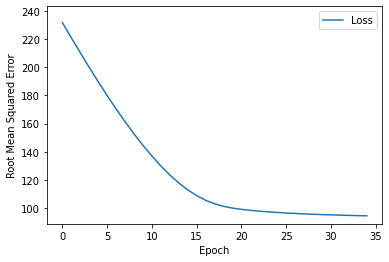


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 9012.2812 - root_mean_squared_error: 94.9330


[9012.28125, 94.93303680419922]

In [32]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)